In [2]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('grade3')

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
copy = data.copy()
data.shape

(1000, 17)

In [3]:
cp = copy

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**DETECTION DES OUTLIERS**

In [5]:
def boxplot(data):
    plt.figure(figsize = (16,6))
    sb.boxplot(data = data)
    plt.grid()

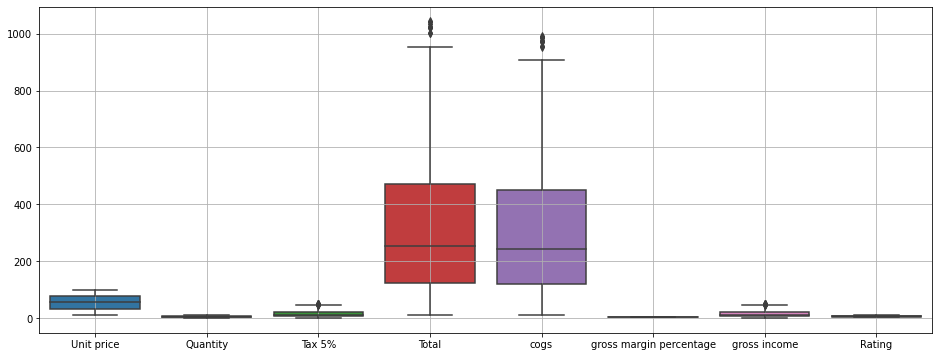

In [6]:
boxplot(data)

In [7]:
features = ['Tax 5%','Total','cogs','gross income']

In [8]:
data[features].describe()

,Tax 5%,Total,cogs,gross income
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,15.379369,322.966749,307.58738,15.379369
std,11.708825,245.885335,234.17651,11.708825
min,0.508500,10.678500,10.17000,0.508500
25%,5.924875,124.422375,118.49750,5.924875
50%,12.088000,253.848000,241.76000,12.088000
75%,22.445250,471.350250,448.90500,22.445250
max,49.650000,1042.650000,993.00000,49.650000


**COMMENT REMPLACER LES OUTLIER ???**

In [9]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

**REMPLACONS MAINTENANT LES VALEURS ABERRANTES POUR TOUTES LES COLONNES DE NOTRE DATASET**

In [24]:
for feature in features:
    impute_outliers(data, feature)

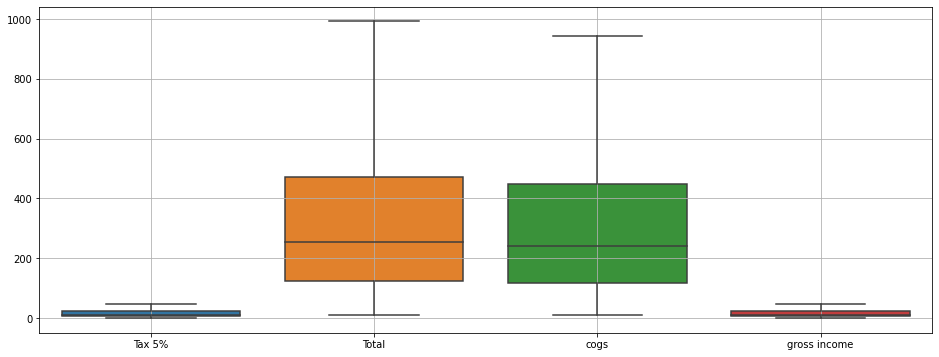

In [25]:
boxplot(data[features])

In [26]:
data[features].describe()

,Tax 5%,Total,cogs,gross income
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,15.365761,322.680988,307.315226,15.365761
std,11.670673,245.084127,233.413455,11.670673
min,0.508500,10.678500,10.170000,0.508500
25%,5.924875,124.422375,118.497500,5.924875
50%,12.088000,253.848000,241.760000,12.088000
75%,22.445250,471.350250,448.905000,22.445250
max,47.225813,991.742062,944.516250,47.225813


**CREER UN SOUS DATASET COMPOSE UNIQUEMENT DES OUTLIERS**

In [13]:
def subdataset_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

In [14]:
for feature in features:
    subdataset_outlier = subdataset_outliers(copy, feature)

In [15]:
subdataset_outlier[features].shape

(9, 4)

In [16]:
subdataset_outlier[features].max()

Tax 5%            49.65
Total           1042.65
cogs             993.00
gross income      49.65
dtype: float64

In [17]:
subdataset_outlier[features]

,Tax 5%,Total,cogs,gross income
166,47.790,1003.590,955.8,47.790
167,49.490,1039.290,989.8,49.490
350,49.650,1042.650,993.0,49.650
357,47.720,1002.120,954.4,47.720
422,48.605,1020.705,972.1,48.605
557,49.260,1034.460,985.2,49.260
699,48.750,1023.750,975.0,48.750
792,48.685,1022.385,973.7,48.685
996,48.690,1022.490,973.8,48.690


**SUPPRESSION DES VALEURS ABERRANTES**

In [18]:
def drop_outliers(df, feature):
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    limit = 1.5*(Q3 - Q1)
    df.drop(df[df[feature] > limit + Q3].index, inplace = True)
    df.drop(df[df[feature] < Q1 - limit].index, inplace = True)

In [19]:
for feature in features:
    drop_outliers(cp, feature)

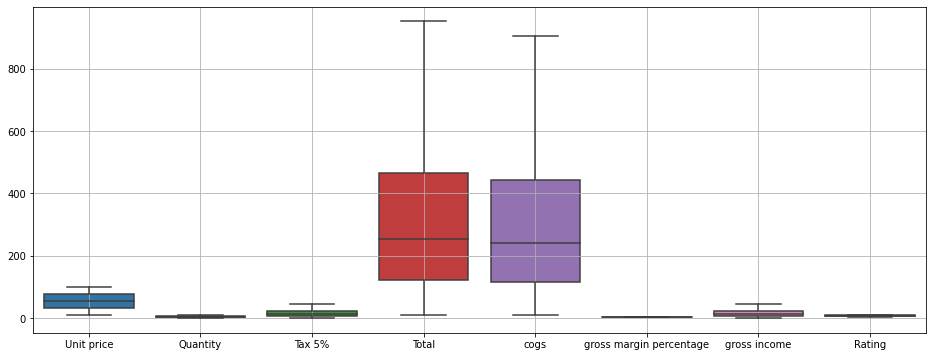

In [20]:
boxplot(cp)

**REJOINDRE LA COMMUNAUTE 👉 https://www.youtube.com/channel/UCE-613S-bsuLukwHDhnRxIA/?sub_confirmation=1**

**VIDEO ASSOCIEE A CE NOTEBOOK 👉 https://youtu.be/SJNw_kxcnpE**

**SI VOUS TROUVEZ QUE CE DEPOT EST UTILE, MERCI D'AJOUTER UNE ETOILE 👆 MERCI POUR SOUTENIR LA CHAINE**